# Домашнее задание №3: SARIMA (1 балл)

<span style="color: red; font-size: 14pt">Дедлайн: 6 сентября 23:59</span>

**Оформление дз**: 

- Task short name: ``HW3 SARIMA``.
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_HW#.ipynb``, к примеру -- ``ML2018_ivanov_HW3.ipynb``
- Присылайте выполненное задание на почту <a href="mailto:ml4megafon_2018_08@bigdatateam.org"> ml4megafon_2018_08@bigdatateam.org</a> с темой письма `` HW# Short name. ФИО ``. 

    Например: `` HW3 SARIMA. Иванов Иван Иванович. ``

**Вопросы**:
- Свои вопросы присылайте в Telegram.

**Фидбек**:
- Пожалуйста, оставьте свой отзыв после выполнения домашнего задания по сссылке:

   http://bit.ly/ml4megafon_august18_hw3sarima_feedback

In [1]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import math
import pandas.tseries.offsets as ofs
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa import stattools

import warnings as w
import plotly.plotly as py

%matplotlib inline

Загрузим данные. Они содержат интервал с пропущенными значениями. Выделим отдельно временной ряд `ts_no_outs` без большого пропуска. По умолчанию будем работать с ним.

In [49]:
ts = pd.read_csv('dataset1_with_outliers_data.csv')
ts.index = pd.to_datetime(ts['ds'])
ts = ts.drop(['ds'], axis=1)
ts.sort_index(inplace=True)

ts_full = ts
ts_no_outs = ts[datetime(2012, 1,1):]
del ts

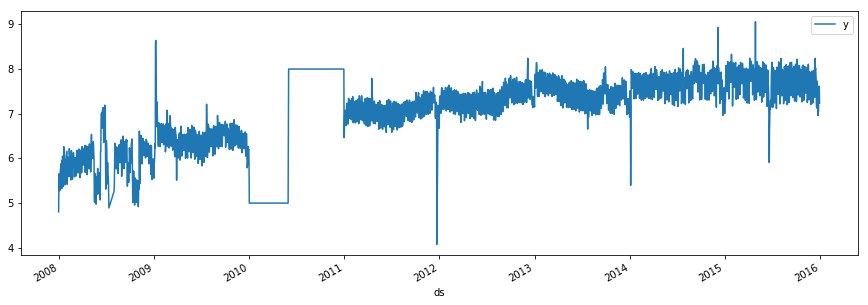

In [50]:
ts_full.plot(figsize=(15,5))

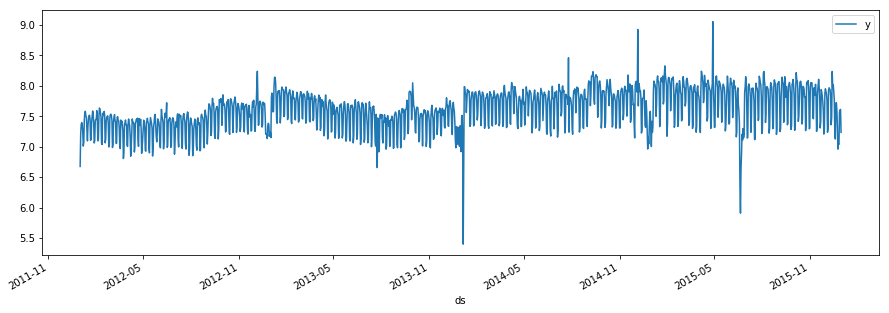

In [51]:
ts_no_outs.plot(figsize=(15,5))

### Часть 0. Разогрев.
Для выполнения этого задания крайне полезно будет просмотреть (и осознать) [вот этот ноутбук](http://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb).

### Часть 1. Проверка ряда на стационарность (20%)

Проверьте ряд на стационарность (например, с помощью критерия [Дики-Фуллера](https://ru.wikipedia.org/wiki/Тест_Дики_—_Фуллера)). Попробуйте привести его к стационарному виду (с помощью преобразования Бокса-Кокса, дифференцирования etc.)

После получения стационарного ряда напишите функцию прямой `transform` и обратной `inv_transform` трансформации временного ряда (т.е. исходный ряд -> стационарный ряд и стационарный ряд -> исходный ряд).

In [ ]:
### Your code here

In [ ]:
def transform(ts):
    ### Your code here
    

def inv_transform(ts):
    ### Your code here

### Часть 2. Обнаружение выбросов (10%).
С помощью экспоненциального сглаживания найдите выбросы в данных (и попробуйте их сгладить). Для этого подберите оптимальные значения параметров `alpha`, `beta` и `std_window`. Функция для детекции аномалий и сглаживания приведена ниже. 

In [ ]:
def exponential_smoothing_anomaly_filter(series, alpha, beta=2.5, std_window=10):
    """
    Anomaly filter based on simple exponential smoothing.

    Parameters
    ----------
    series : pandas.Series
        Time series to smooth.
    alpha : float in range [0., 1.]
        Smoothing parameter. The smaller is `alpha`, the smoother are result series.
    beta: float
        Multiplier for rolling standard deviation. If the deviation from smoothed time series in some point is bigger
        than `beta`*rolling_std, that point is marked as anomaly.
    std_window : int
        Rolling std window width.

    Returns
    -------
    _ : pandas.Series
        Smoothed time series.
    _ : pandas.Series
        Series containing anomalies (both time and value).
    """


    result = [series[0]] # first value is same as series
    sx = series.rolling(std_window).std()
    anomalies_index = []
    anomalies_values = []
#     print(len(series), len(sx))
    for n in range(1, len(series)):
        if n > std_window:
            if abs(series[n] - result[n-1]) > sx[n]*beta:
                result.append(result[n-1])
                anomalies_index.append(series.index[n])
                anomalies_values.append(series[n])
                continue
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(index=series.index, data=result), pd.Series(index=anomalies_index, data=anomalies_values)

In [ ]:
### Your code here

### Часть 3. Построение SARIMA модели (60%)
Так как данная часть не разбиралась на лекции, крайне рекомнедуем к прочтению (приведенным в статье кодом также можно пользоваться) часть по SARIMA [занятия №9 курса от ODS](https://habr.com/company/ods/blog/327242/) (это тот же материал, на который ссылается ноутбук из части 0, но в виде статьи). Также может быть полезным прочитать [раз](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/) и [два](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_russian/topic09_time_series/Time_Series_Riabenko.pdf).

In [106]:
#SARIMA available in sm.tsa.statespace.SARIMAX

Подберите оптимальные коэффициенты `p`, `d`, `q` и `P`, `D`, `Q` для SARIMA модели и постройте свой прогноз. Подбирать оптимальные значения стоит с помощью кросс-валидации (отсылка к семинару ;) ). Обучение будем проводить только на `ts_train`.

Пойстройте ACF и PACF, оцените по ним параметры `p`, `q`, `P`, `Q`.

In [25]:
### Your code here

Переберите несколько возможных комбинаций параметров. Оцените качество и выберите лучший набор параметров. 

In [ ]:
### Your code here

Прогноз будем делать на 2 недели вперед. Оцените качество прогноза с помощью MSE, MAE и $r^2$-score. 

In [91]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Your code here

### Часть 4. Сравнение с линейной авторегрессией. (10%)

Теперь сравним результаты SARIMA с простой линейной авторегрессией. Для построения авторегрессионной матрицы воспользуемся функцией из курса ODS.

In [102]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    data.index = data.index.to_datetime()
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

Будем начинать с 14 лага (т.е. модель может построить прогноз на 2 недели вперед на исторических данных).

In [103]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = prepareData(ts_train, test_size=0.3, lag_start=14, lag_end=49)

Нарисуем матрицу `X_train` (это часть авторегрессионной матрицы) с учетом дополнительных данных о выходных:

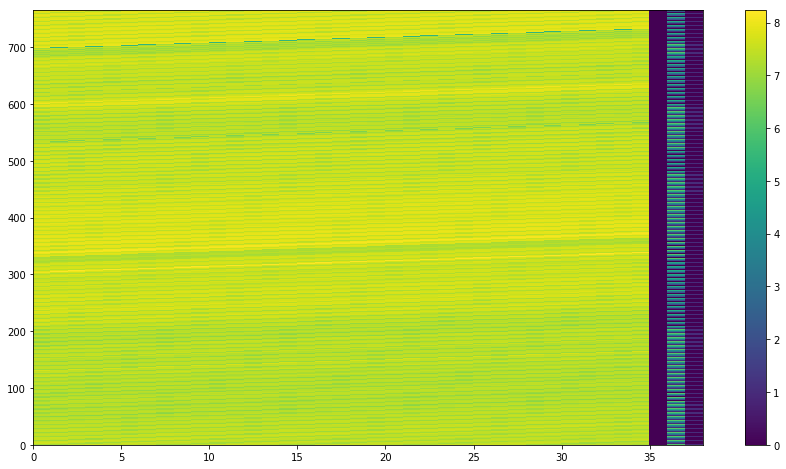

In [104]:
plt.figure(figsize=(15, 8))
plt.pcolor(X_train)
plt.colorbar()

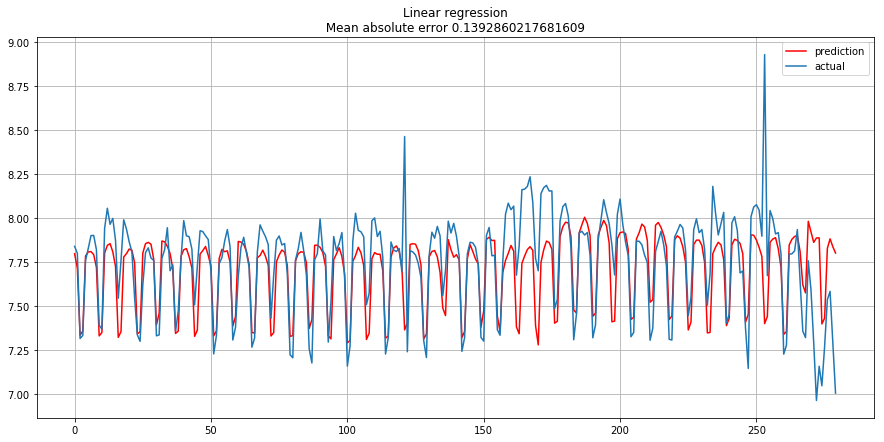

In [105]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} ".format(mean_absolute_error(prediction, y_test)))
plt.grid(True);

Сравните полученное качество предсказания с также с помощью MSE и $r^2$-score. Получился ли результат лучше, чем в случае с SARIMA? Как думаете, почему?

In [ ]:
### Your code here

Пожалуйста, оставьте отзыв о домашнем задании: [link](http://bit.ly/ml4megafon_august18_hw3sarima_feedback)